In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
digits = load_digits()
class_names = digits.target_names
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=10)

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes, title, cmap=plt.cm.Spectral):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.show()

## k-NN

Test accuracy: 0.9831649831649831
Train accuracy: 0.9891936824605154


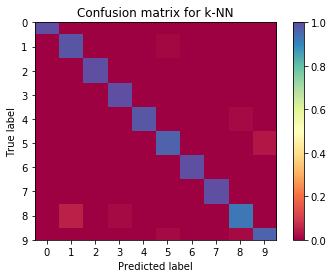

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print("Test accuracy:",model.score(X_test,y_test))
print("Train accuracy:",model.score(X_train,y_train))

plot_confusion_matrix(y_test, model.predict(X_test), class_names, "Confusion matrix for k-NN")

## SVM

Test accuracy: 0.9831649831649831
Train accuracy: 0.9950124688279302


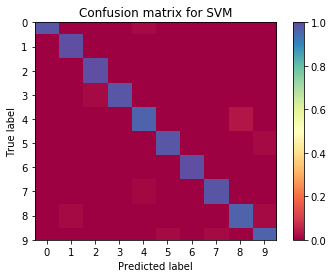

In [5]:
from sklearn.svm import SVC

model = SVC(gamma='scale')
model.fit(X_train, y_train)
print("Test accuracy:",model.score(X_test,y_test))
print("Train accuracy:",model.score(X_train,y_train))

plot_confusion_matrix(y_test, model.predict(X_test), class_names, "Confusion matrix for SVM")

## Random Forest

Test accuracy: 0.9696969696969697
Train accuracy: 1.0


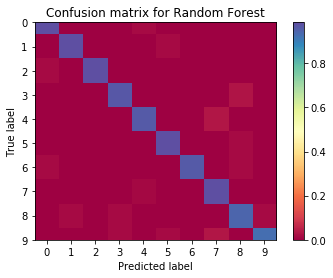

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
print("Test accuracy:",model.score(X_test,y_test))
print("Train accuracy:",model.score(X_train,y_train))

plot_confusion_matrix(y_test, model.predict(X_test), class_names, "Confusion matrix for Random Forest")

We can see that all the models have a rather high test accuracy, and so there is not much confusion to find in the matrixes. Random Forest seems to confuse the digits the most of all the algorithms, though this is marginal. This can be reflected in the test accuracy, being somewhat lower than with the two other algorithms